In [1]:
import os
import re
import cv2
# import itk
import SimpleITK as sitk
import glob
import random
import shutil
import glob
import numpy as np
# import splitfolders
# import nibabel as nb
from PIL import Image
import SimpleITK as sitk
import matplotlib.pyplot as plt
import scipy.ndimage as snd
from skimage.transform import AffineTransform, warp
from skimage.filters.thresholding import threshold_otsu

In [2]:
# friend code for image numbering
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [8]:
scaling = random.uniform(.8,1.2)

In [9]:
scaling

0.884726886870991

In [3]:
import numpy as np
from scipy.ndimage import zoom


def clipped_zoom(img, zoom_factor, **kwargs):

    h, w = img.shape[:2]

    # For multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # Zooming out
    if zoom_factor < 1:

        # Bounding box of the zoomed-out image within the output array
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        # Zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)

    # Zooming in
    elif zoom_factor > 1:

        # Bounding box of the zoomed-in region within the input array
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)

        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # If zoom_factor == 1, just return the input array
    else:
        out = img
    return out

In [14]:
img1 = cv2.imread(r"E:\Project\NewData_with_scaling\Original_moving\Moving_Binarised_train50.png")
img1 = np.array(img1)

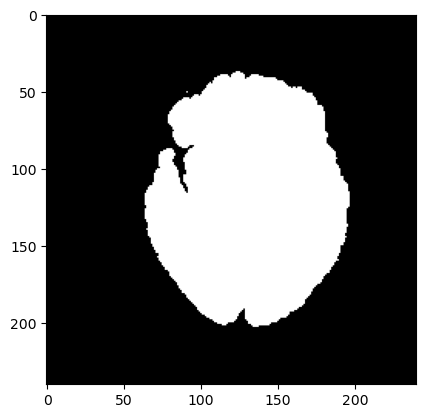

In [17]:
plt.imshow(img1)
plt.show()

In [23]:
img_z = clipped_zoom(img1,0.8)

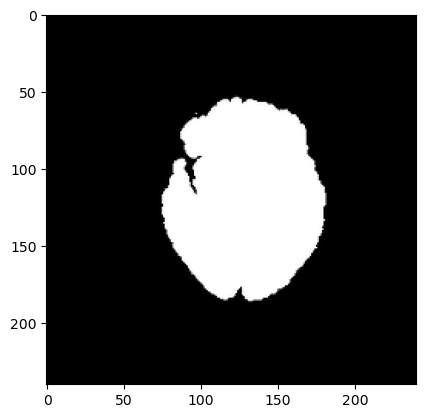

In [24]:
plt.imshow(img_z)
plt.show()

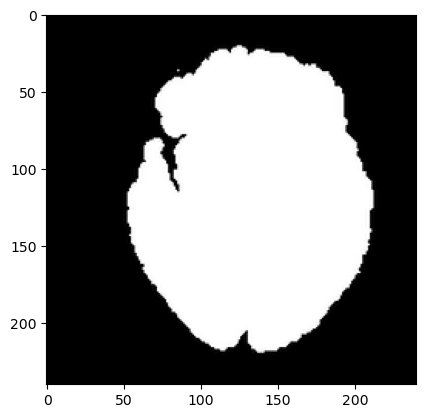

In [25]:
img_z = clipped_zoom(img1,1.2)
plt.imshow(img_z)
plt.show()

In [29]:
# Providing random scaling to the images and saving the transformation data in a csv file
fixed_path = r"E:\Project\NewData_with_scaling\Original_moving"
moving_path = r"E:\Project\NewData_with_scaling\Moving_scaling"

transformations = []
for index, file in enumerate(sorted(glob.glob(fixed_path + "/*.png"), key=numericalSort)):
    fixed_image = cv2.imread(file)
    
    scaling = random.uniform(.8,1.2)

    # Give random translation(+-2.5 mm) and rotation(+-5 degrees)
#     translation=[random.uniform(-2.5, 2.5) for p in range(0, 2)]
#     rotation=random.uniform(-0.08726646, 0.08726646)
#     transformation = AffineTransform(translation=translation, rotation=rotation)
#     moving_image  = warp(fixed_image, transformation)
    moving_scaled = clipped_zoom(fixed_image,scaling)
    os.chdir(moving_path)
    plt.imsave('moving_scaled' + str (index) + '.png', moving_scaled, cmap='gray')
    transformations.append(scaling)

In [31]:
# Scaling the flair images
fixed_path = r"E:\Project\NewData_with_scaling\Moving_flair_original"
moving_path = r"E:\Project\NewData_with_scaling\Moving_flair_scaled"

for index, file in enumerate(sorted(glob.glob(fixed_path + "/*.png"), key=numericalSort)):
    fixed_image = cv2.imread(file)
    

    # Give random translation(+-2.5 mm) and rotation(+-5 degrees)
#     translation=[random.uniform(-2.5, 2.5) for p in range(0, 2)]
#     rotation=random.uniform(-0.08726646, 0.08726646)
#     transformation = AffineTransform(translation=translation, rotation=rotation)
#     moving_image  = warp(fixed_image, transformation)
    moving_scaled = clipped_zoom(fixed_image,transformations[index])
    os.chdir(moving_path)
    plt.imsave('moving_scaled_fl' + str (index) + '.png', moving_scaled, cmap='gray')

In [32]:
import csv
with open("E:\Project\NewData_with_scaling\train_transforms.csv", 'r') as csvinput:
    with open(output.csv, 'w')as csvoutput:
        writer = csv.writer(csvoutput)
        for row in csv.reader(csvinput):
            writer.writerow(row + ['Scaling'])


In [41]:
# For train transformations
os.chdir(r"E:\Project\NewData_with_scaling")
tf = []
for i in range(len(transformations)):
    tf.append([transformations[i]])
import csv 
Details = ['Scaling']  
rows = tf
with open('train_transforms_scaling.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerow(Details) 
    write.writerows(tf) 

In [39]:
import csv 
data = transformations 
file = open('odd.csv', 'w+', newline ='') 
with file:     
    write = csv.writer(file) 
    write.writerows(data) 

Error: iterable expected, not float

In [37]:
tf

[1.0630693454174671,
 1.1078042805190182,
 0.8892720543009509,
 1.1675635025333981,
 1.045448592258132,
 1.117944837964176,
 0.9687703124358331,
 1.0067526439148624,
 1.0485586219985101,
 0.9549013311529023,
 0.9289299671619584,
 1.0833414262031364,
 1.083095724499447,
 0.8236007860923804,
 1.0817657118546915,
 0.9244096551337928,
 0.8623902669518746,
 0.9833631783505705,
 0.8448229388318684,
 1.0399008155646126,
 0.8096102552628845,
 1.1275938624186075,
 1.1462372822443132,
 0.9753308118907661,
 1.0282348975436686,
 0.9595112312317984,
 1.0522635842155126,
 1.1520758059614966,
 1.0126203675201402,
 0.8119162963540056,
 1.0817090712948714,
 0.8300597160386523,
 0.9659059018075051,
 0.9128553902486605,
 1.0561435950186722,
 0.9771703048357766,
 0.8089082571829838,
 1.008868193775911,
 1.054267322875976,
 1.0896793522416215,
 1.166734451874086,
 0.879329873037772,
 1.0770960892056038,
 0.8861043907036317,
 1.1601353316963299,
 1.0628671523634186,
 1.0998342090272,
 0.8831691993965278,
 0

In [43]:
transformations[7999]

0.8065338606835986